# Project 1, Part 3, Executive Questions: Product Specific Questions

University of California, Berkeley
Master of Information and Data Science (MIDS) program
w205 - Fundamentals of Data Engineering

Student: John (Jack) Galvin

Year: 2022

Semester: Spring

Section: 9


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
# Function to run a select query and return rows in a pandas dataframe
# Pandas puts all numeric values from postgres to float
# If it will fit in an integer, change it to integer


def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

In [3]:
# Connect to Postgres

connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

In [4]:
# Create a cursor for the connection

cursor = connection.cursor()

# Instructions for Specific Questions

For each specific quesion, you must write 1 and only 1 query that answers that specific question.  The results of your query must be displayed in a Pandas dataframe as demonstrated in the labs

All output should be sorted.

For store name, use the city name the store is located in.

When sorting by store name, sort in alphabetical order.

For meal name, use the product description.

When sorting by meal name, sort in alphabetical order.

For month, use the full month name: January, February, March, etc.

When sorting by month, sort in calendar order: January, February, March, etc.  You may find it useful to include a month number to help with the sort.  It's ok to leave it in the output.

For day of week, use the full day of week name: Sunday, Monday, Tuesday, etc.

When sorting by day of week, sort in day of week order: Sunday, Monday, Tuesday, etc. You may find it usefule to include a day of week number to help with the sort.  It's ok to leave it in the output.


# 1.3.1 How many meals were purchased for all of AGM?

In [5]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(quantity) as total_meals
from line_items

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_meals
0,8228284


# 1.3.2 How many meals were purchased for all of AGM by meal?

Sort by meal name in alphabetical order

In [6]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select p.description as product,
       sum(l.quantity) as total_quantity_sold
from line_items as l
     join products as p
         on l.product_id = p.product_id
group by product
order by product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,product,total_quantity_sold
0,Brocolli Stir Fry,913984
1,Chicken Salad,228561
2,Curry Chicken,1368884
3,Eggplant Lasagna,1599058
4,Pistachio Salmon,1828778
5,Spinach Orzo,456769
6,Teriyaki Chicken,1145013
7,Tilapia Piccata,687237


# 1.3.3 How many meals were purchased by store and by meal?

Sort by store name in alphabetical order, then by meal name in alphabetical order

In [7]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        p.description as product,
        sum(l.quantity) as total_quantity_sold
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
    join products as p
        on l.product_id = p.product_id
group by store, product
order by store, product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,product,total_quantity_sold
0,Berkeley,Brocolli Stir Fry,232038
1,Berkeley,Chicken Salad,57719
2,Berkeley,Curry Chicken,346508
3,Berkeley,Eggplant Lasagna,405637
4,Berkeley,Pistachio Salmon,464274
5,Berkeley,Spinach Orzo,115469
6,Berkeley,Teriyaki Chicken,290858
7,Berkeley,Tilapia Piccata,174252
8,Dallas,Brocolli Stir Fry,179885
9,Dallas,Chicken Salad,44756


# 1.3.4 How many meals were purchased by month?

Sort by month in calendar order

In [8]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        sum(l.quantity) as total_quantity_sold
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
group by moy, month
order by moy

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,moy,month,total_quantity_sold
0,1,January,650319
1,2,February,631190
2,3,March,731635
3,4,April,687607
4,5,May,664820
5,6,June,677009
6,7,July,666087
7,8,August,752484
8,9,September,631580
9,10,October,741259


# 1.3.5 How many meals were purchased by month and meal?

Sort by month in calendar order, then by meal name in alphabetical order

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(month from sa.sale_date) as moy,
        to_char(sa.sale_date, 'Month') as month,
        p.description as product,
        sum(l.quantity) as total_quantity_sold
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
    join products as p
        on l.product_id = p.product_id
group by moy, month, product
order by moy, product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,moy,month,product,total_quantity_sold
0,1,January,Brocolli Stir Fry,72161
1,1,January,Chicken Salad,18003
2,1,January,Curry Chicken,108134
3,1,January,Eggplant Lasagna,126605
4,1,January,Pistachio Salmon,144053
...,...,...,...,...
91,12,December,Eggplant Lasagna,134666
92,12,December,Pistachio Salmon,154242
93,12,December,Spinach Orzo,38297
94,12,December,Teriyaki Chicken,96896


# 1.3.6 How many meals were purchased by day of week and meal?

Sort by day of week in day of week order, then by meal name in alphabetical order

In [10]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sa.sale_date) as dow,
       to_char(sa.sale_date, 'Day') as day_of_week,
       p.description as product,
       sum(l.quantity) as total_quantity_sold
from sales as sa
     join line_items as l
         on sa.store_id = l.store_id and sa.sale_id = l.sale_id
     join products as p
         on l.product_id = p.product_id
group by product, dow, day_of_week
order by dow, product

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,dow,day_of_week,product,total_quantity_sold
0,0,Sunday,Brocolli Stir Fry,172250
1,0,Sunday,Chicken Salad,43110
2,0,Sunday,Curry Chicken,257216
3,0,Sunday,Eggplant Lasagna,301726
4,0,Sunday,Pistachio Salmon,344315
5,0,Sunday,Spinach Orzo,85968
6,0,Sunday,Teriyaki Chicken,215741
7,0,Sunday,Tilapia Piccata,128763
8,1,Monday,Brocolli Stir Fry,121717
9,1,Monday,Chicken Salad,30790


# 1.3.7 Average number of meals per sale for all of AGM


In [11]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sum(l.quantity) as total_meals,
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns,
        sum(l.quantity) / count(distinct sa.store_id || '-' || sa.sale_id) as avg_meals_per_txn
from sales as sa
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,total_meals,total_txns,avg_meals_per_txn
0,8228284,1537617,5.351322


# 1.3.8 Average number of meals per sale by store

Sort by store name in alphabetical order


In [12]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select s.city as store,
        sum(l.quantity) as total_meals,
        count(distinct sa.store_id || '-' || sa.sale_id) as total_txns,
        sum(l.quantity) / count(distinct sa.store_id || '-' || sa.sale_id) as avg_meals_per_txn
from stores as s
    join sales as sa
        on s.store_id = sa.store_id
    join line_items as l
        on sa.store_id = l.store_id and sa.sale_id = l.sale_id
group by store
order by store

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,store,total_meals,total_txns,avg_meals_per_txn
0,Berkeley,2086755,390375,5.345514
1,Dallas,1617355,302120,5.353353
2,Miami,1474367,275074,5.359892
3,Nashville,1214431,227721,5.332978
4,Seattle,1835376,342327,5.361470


# 1.3.9 The Executives have also asked you to provide your best example of a data visualization for one of the above queries

You may choose any one of the above queries. 

It's best to select the one that you think will provide the most interesting data visualization.  

You are allowed to add a pivot as demonstrated in the labs if it is needed for your data visualization. 

In [13]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select extract(dow from sa.sale_date) as dow,
       to_char(sa.sale_date, 'Day') as day_of_week,
       p.description as product,
       sum(l.quantity) as total_quantity_sold
from sales as sa
     join line_items as l
         on sa.store_id = l.store_id and sa.sale_id = l.sale_id
     join products as p
         on l.product_id = p.product_id
group by product, dow, day_of_week
order by dow, product

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,dow,day_of_week,product,total_quantity_sold
0,0,Sunday,Brocolli Stir Fry,172250
1,0,Sunday,Chicken Salad,43110
2,0,Sunday,Curry Chicken,257216
3,0,Sunday,Eggplant Lasagna,301726
4,0,Sunday,Pistachio Salmon,344315
5,0,Sunday,Spinach Orzo,85968
6,0,Sunday,Teriyaki Chicken,215741
7,0,Sunday,Tilapia Piccata,128763
8,1,Monday,Brocolli Stir Fry,121717
9,1,Monday,Chicken Salad,30790


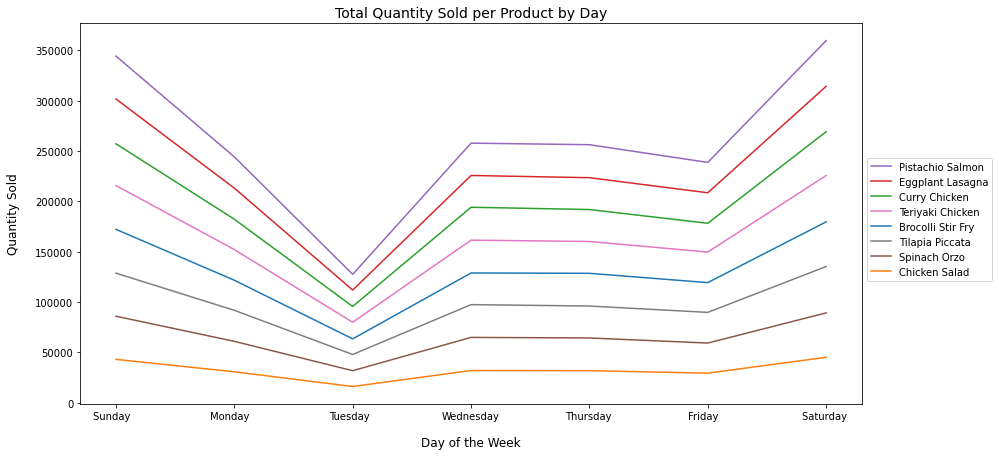

In [15]:
# Plot the results of the query
fig, ax = plt.subplots()
fig = df.groupby(["day_of_week", "product"], sort=False)["total_quantity_sold"].sum().unstack(level=1).plot(figsize=(14,7), ax=ax)

# Change order of legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [4, 3, 2, 6, 0, 7, 5, 1]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1, 0.66), ncol=1)

# Add titles and axes labels
plt.title("Total Quantity Sold per Product by Day", fontsize=14)
ax.set_ylabel("Quantity Sold", labelpad=15, fontsize=12)
ax.set_xlabel("Day of the Week", labelpad=15, fontsize=12);